In [1]:
import pandas as pd
import numpy as np
import gensim
import jieba
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
path = r'C:\Users\liuni\Desktop\assignment\project2\ai_challenger_sentiment_analysis_trainingset_20180816/sentiment_analysis_trainingset.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
def cut(words):
    detailed_words = []
    _words = words
    while _words:
        words = sorted(jieba.lcut_for_search(_words), key=lambda x: len(x))
        for w in words:
            if _words.startswith(w):
                detailed_words.append(w)
                _words = _words[len(w):]
                break
    return detailed_words

cut('霸王餐'), cut('舍得吃'), *cut('舍得吃霸王餐'), jieba.lcut('舍得吃霸王餐'), cut('霸王')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\liuni\AppData\Local\Temp\jieba.cache
Loading model cost 0.825 seconds.
Prefix dict has been built succesfully.


(['霸王', '餐'], ['舍得', '吃'], '舍得', '吃', '霸王', '餐', ['舍得吃', '霸王餐'], ['霸王'])

In [5]:
# 这是我去网上下载的cboe的word2vec, 估计比我训练的要好
word2vec = gensim.models.KeyedVectors.load_word2vec_format(r'C:\Users\liuni\Desktop\assignment\project2\cn.cbow.bin', binary=True, unicode_errors='ignore')

In [6]:
content_cut = [jieba.lcut(el) for el in df['content']]

In [7]:
with open('百度停用词表.txt', 'r', -1, 'utf8') as f:
    stop_word = f.readlines()
stop_word = set([el.rstrip('\n') for el in stop_word if el.rstrip('\n') ])

In [8]:
content_cut = [[e for e in el if e not in stop_word] for el in content_cut]

In [9]:
_content_cut = []
for el in content_cut:
    sentense = []
    for e in el:
        if e in word2vec.wv:
            sentense.append(e)
        else:
            sentense.extend(cut(e))
    _content_cut.append(sentense)

C:\Users\liuni\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [10]:
content_cut = _content_cut

In [11]:
length = sorted([len(el) for el in content_cut])

(array([2.0000e+00, 3.8000e+01, 1.8296e+04, 3.5829e+04, 1.8850e+04,
        1.0134e+04, 6.4920e+03, 4.4630e+03, 3.2370e+03, 2.1020e+03,
        1.3860e+03, 9.9300e+02, 6.9100e+02, 5.3900e+02, 4.0500e+02,
        3.1400e+02, 2.3800e+02, 2.0200e+02, 1.5000e+02, 1.3900e+02,
        9.7000e+01, 8.0000e+01, 5.6000e+01, 3.8000e+01, 4.3000e+01,
        2.7000e+01, 3.5000e+01, 2.8000e+01, 3.3000e+01, 1.6000e+01,
        1.5000e+01, 1.1000e+01, 7.0000e+00, 6.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   9.  ,   41.62,   74.24,  106.86,  139.48,  172.1 ,  204.72,
         237.34,  269.96,  302.58,  335.2 ,  367.82,  400.44,  433.06,
         465.68,  498.3 ,  530.92,  563.54,  596.16,  628.78,  661.4 ,
         694.02,  726.64,  759.26,  791.88,  824.5 ,  857.12,  889.74,
         922.36,  954.98,  987.6 ,

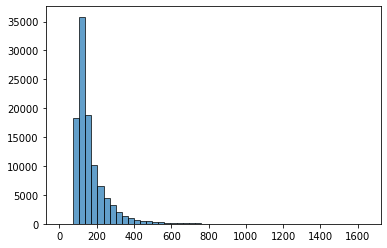

In [12]:
plt.hist(length, bins=50, edgecolor="black", alpha=0.7)

In [13]:
length[int(len(length) * 0.98)]

456

In [14]:
truncate = 450

In [15]:
content_cut = [[e for e in el if e in word2vec.wv][:truncate] for el in content_cut]

C:\Users\liuni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [16]:
df[['content']]

,content
0,"""吼吼吼，萌死人的棒棒糖，中了大众点评的霸王餐，太可爱了。一直就好奇这个棒棒糖是怎么个东西，..."
1,"""第三次参加大众点评网霸王餐的活动。这家店给人整体感觉一般。首先环境只能算中等，其次霸王餐提..."
2,"""4人同行 点了10个小吃\n榴莲酥 榴莲味道不足 松软 奶味浓\n虾饺 好吃 两颗大虾仁\..."
3,"""之前评价了莫名其妙被删 果断继续差评！ 换了菜单 价格更低 开始砸牌子 但套餐还是有150..."
4,"""出乎意料地惊艳，椰子鸡清热降火，美容养颜，大大满足了爱吃火锅怕上火星人。椰子冻是帅帅的老板..."
...,...
104995,"""中午吃饭去的，总体感觉不错。用了点评团购的午市代金券，相当于打7折，折扣力度不小。\n简单..."
104996,"""今天晚上六点钟准时来到了位于红山路高家村42号的味香情太空舱果木烤吧，参加大众点评组织的同..."
104997,"""办留学手续应个景儿，来到这儿吃我最喜欢的日料之一：味增拉面。みそ、しょうゆ是两个拉面基本款..."
104998,"""和票专程来这边找美食吃，早就听说这家店，刚好路过就来试下～\n按照大众的地图导航还是比较好..."


In [18]:
df['content'] = content_cut

In [22]:
# import pickle
# pickle.dump(content_cut, open('train.pkl', 'wb'))
df.to_pickle('train.pkl')

In [ ]:
# add = np.array([0 for _ in range(300)])

In [ ]:
# content_cut = [np.array(el + [add for _ in range(truncate - len(el))]) for el in content_cut]

In [27]:
df = pd.read_csv(r'C:\Users\liuni\Desktop\assignment\project2\ai_challenger_sentiment_analysis_validationset_20180816\sentiment_analysis_validationset.csv')

In [28]:
content_cut = [jieba.lcut(el) for el in df['content']]

In [29]:
content_cut = [[e for e in el if e not in stop_word] for el in content_cut]

In [30]:
_content_cut = []
for el in content_cut:
    sentense = []
    for e in el:
        if e in word2vec.wv:
            sentense.append(e)
        else:
            sentense.extend(cut(e))
    _content_cut.append(sentense)
content_cut = _content_cut

C:\Users\liuni\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [31]:
content_cut = [[e for e in el if e in word2vec.wv][:truncate] for el in content_cut]

C:\Users\liuni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [32]:
df['content'] = content_cut

In [33]:
# pickle.dump(content_cut, open('validation.pkl', 'wb'))
df.to_pickle('validation.pkl')